<a href="https://colab.research.google.com/github/Filip1010/Lab2-VNP/blob/master/LAb2_WarmUp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install gdown
import pandas as pd

In [8]:
!gdown 1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS

Downloading...
From: https://drive.google.com/uc?id=1CkUp_wtuauTNL9aOW-K52jDlTXqD4KWS
To: /content/diabetes.csv
100% 23.8k/23.8k [00:00<00:00, 35.0MB/s]


In [9]:
df = pd.read_csv('/content/diabetes.csv')

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
import numpy as np

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               737 non-null    float64
 1   Glucose                   737 non-null    int64  
 2   BloodPressure             737 non-null    int64  
 3   SkinThickness             737 non-null    float64
 4   Insulin                   737 non-null    int64  
 5   BMI                       737 non-null    float64
 6   DiabetesPedigreeFunction  737 non-null    float64
 7   Age                       737 non-null    int64  
 8   Outcome                   737 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 57.6 KB


In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


In [21]:
missing_values = df.isna().sum()

In [23]:
missing_values_percentage = (missing_values /len(df)) * 100

In [24]:
print(missing_values_percentage)

Pregnancies                 1.822917
Glucose                     0.000000
BloodPressure               0.000000
SkinThickness               1.041667
Insulin                     0.000000
BMI                         1.302083
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64


In [38]:
null = pd.isna(df).sum().sum()

In [ ]:
!pip install missingno seaborn matplotlib


In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


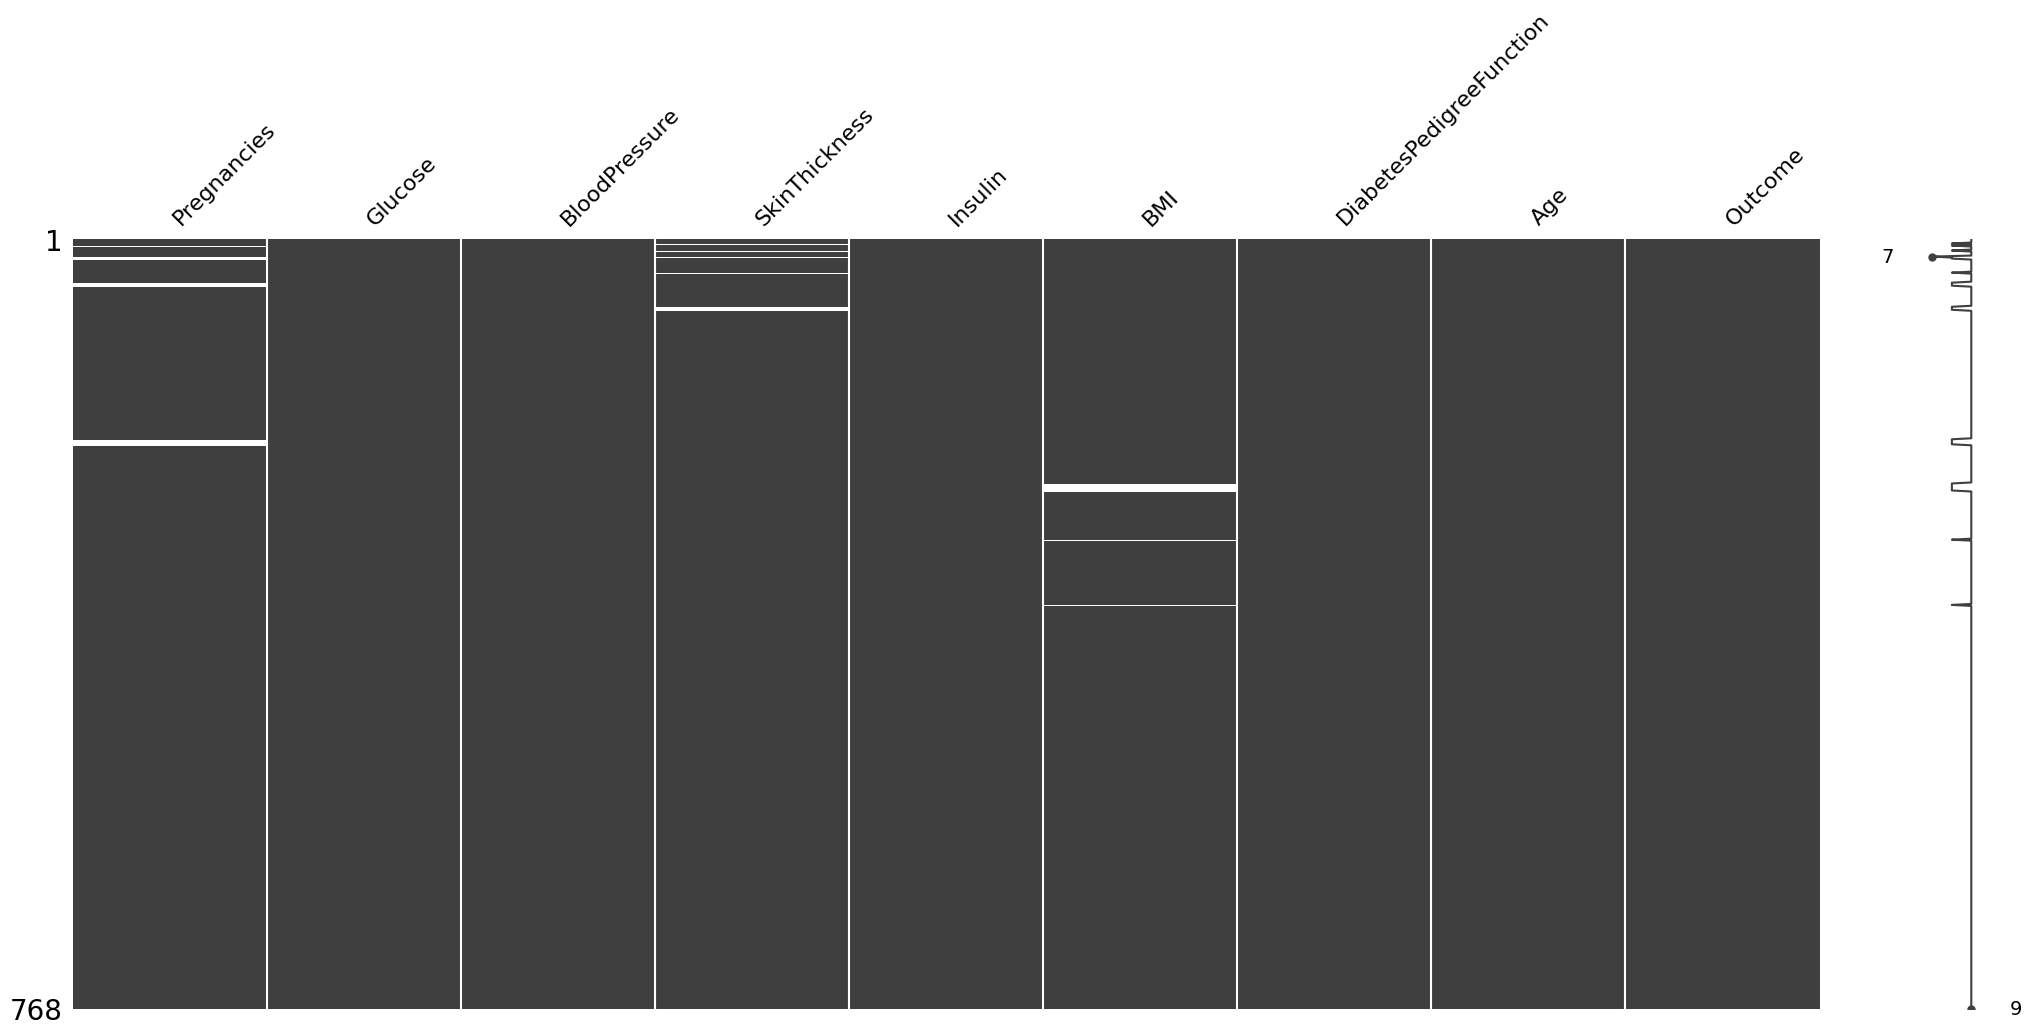

In [10]:
msno.matrix(df)
plt.show()


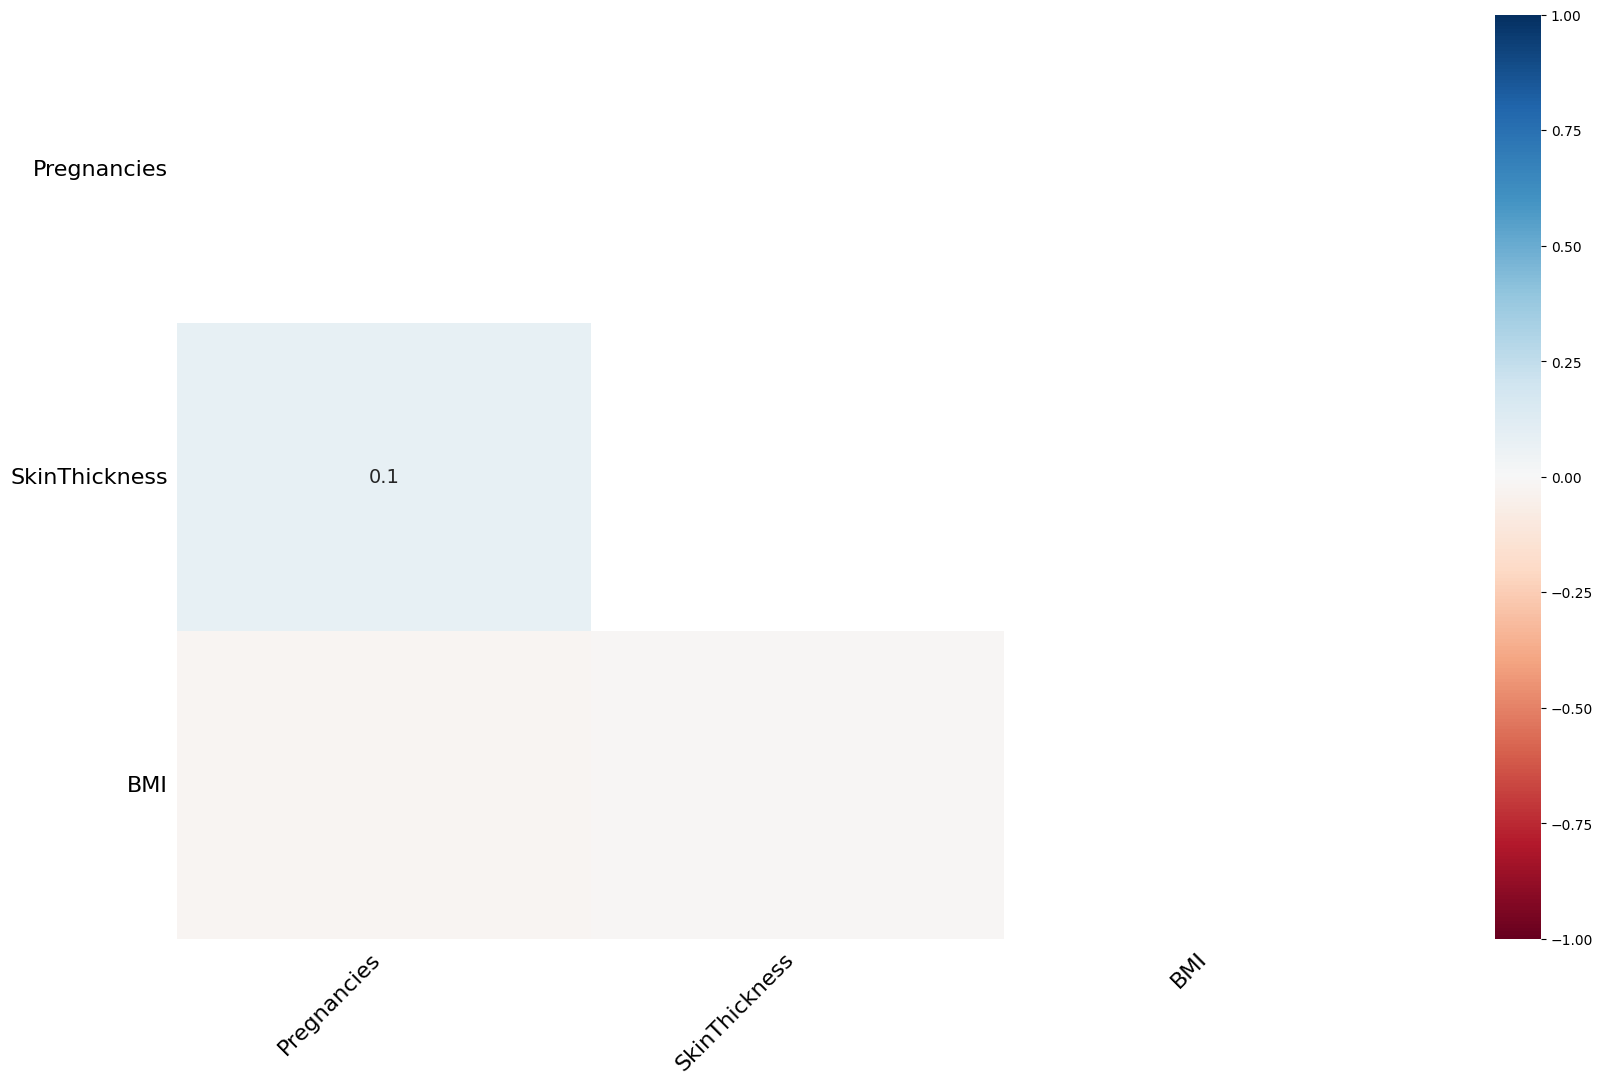

In [11]:
msno.heatmap(df)
plt.show()


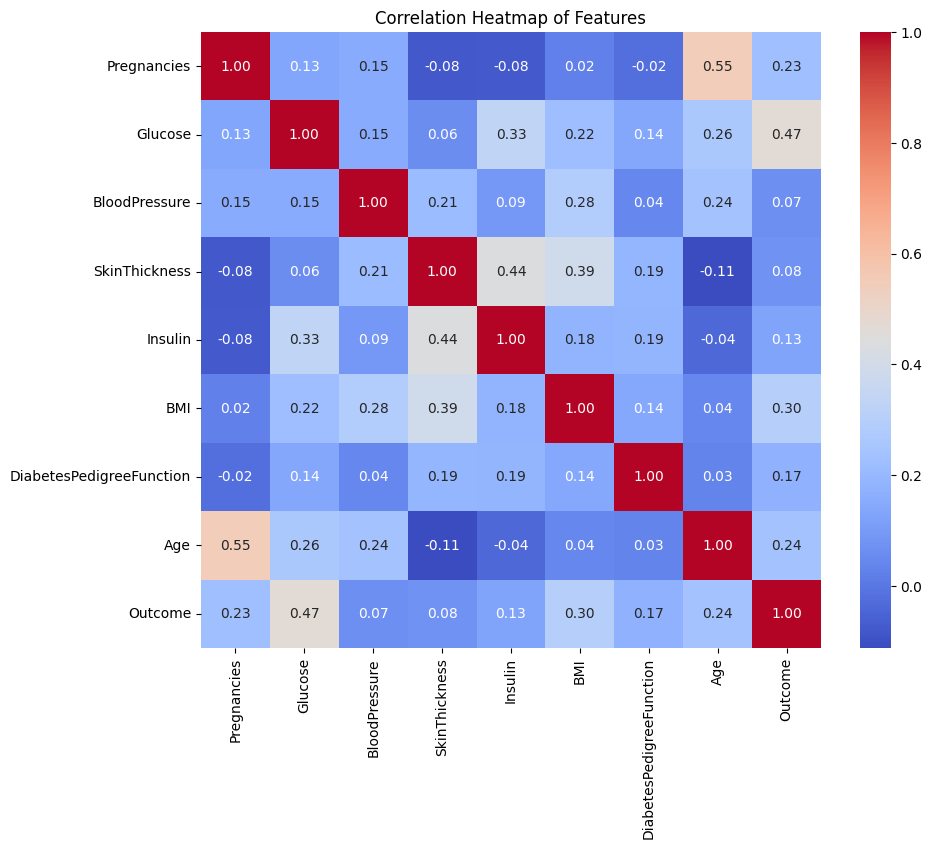

In [15]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


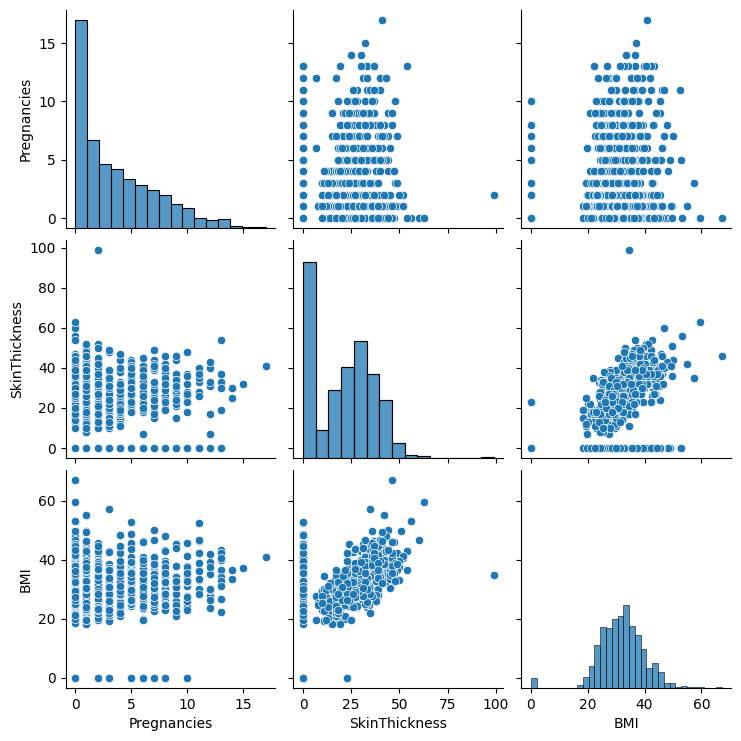

In [14]:
missing_columns = df.columns[df.isna().sum() > 0]

sns.pairplot(df[missing_columns])
plt.show()


In [25]:
df.isna().sum()


,0
Pregnancies,14
Glucose,0
BloodPressure,0
SkinThickness,8
Insulin,0
BMI,10
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [26]:
df.dropna(inplace=True)

In [27]:
df.dropna(axis=1 , inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               737 non-null    float64
 1   Glucose                   737 non-null    int64  
 2   BloodPressure             737 non-null    int64  
 3   SkinThickness             737 non-null    float64
 4   Insulin                   737 non-null    int64  
 5   BMI                       737 non-null    float64
 6   DiabetesPedigreeFunction  737 non-null    float64
 7   Age                       737 non-null    int64  
 8   Outcome                   737 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 57.6 KB


In [32]:
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [36]:
#df['Pregnancies'].fillna(df['Pregnancies'].mean(), inplace=True)
#df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
#df['BMI'].fillna(df['BMI'].mean(), inplace=True)
# moze i so prosekot .

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50,1
1,1.0,85,66,29.0,0,26.6,0.351,31,0
2,8.0,183,64,0.0,0,23.3,0.672,32,1
3,1.0,89,66,23.0,94,28.1,0.167,21,0
4,0.0,137,40,35.0,168,43.1,2.288,33,1


In [35]:
df.to_csv('diabetes_cleaned.csv', index=False)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix , classification_report

In [38]:
df = pd.read_csv('diabetes_cleaned.csv')

In [39]:
x = df.drop('Outcome' , axis=1)
y = df['Outcome']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [50]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train , y_train)

y_pred = knn.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.97%


In [52]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[77 20]
 [20 31]]


In [53]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        97
           1       0.61      0.61      0.61        51

    accuracy                           0.73       148
   macro avg       0.70      0.70      0.70       148
weighted avg       0.73      0.73      0.73       148

